In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## load the data

In [3]:
df = pd.read_csv('data.csv')
print("done")

done


## understanding the data

In [4]:
df.shape

(381109, 12)

In [5]:
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
190092,190093,Female,28,1,28.0,1,1-2 Year,No,2630.0,157.0,260,0
69364,69365,Male,47,1,22.0,0,1-2 Year,Yes,2630.0,157.0,296,0
351309,351310,Female,33,1,28.0,1,< 1 Year,No,24672.0,152.0,283,0
283902,283903,Male,21,1,15.0,0,< 1 Year,Yes,28135.0,152.0,254,0
217084,217085,Female,25,1,28.0,0,< 1 Year,No,31530.0,152.0,10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr(numeric_only=True)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


## EDA

In [17]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [18]:
df['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [19]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [20]:
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [21]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

<Axes: xlabel='Annual_Premium', ylabel='Density'>

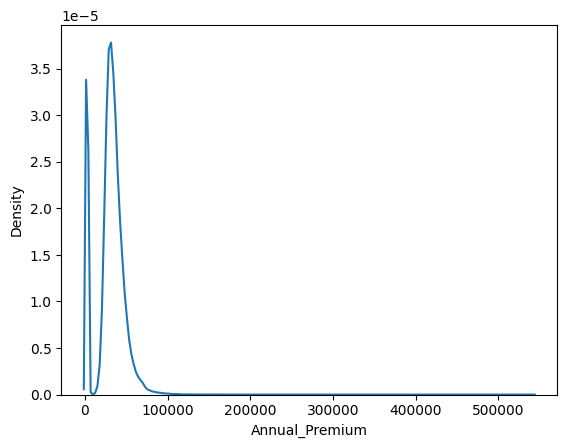

In [24]:
sns.kdeplot(df['Annual_Premium'])

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

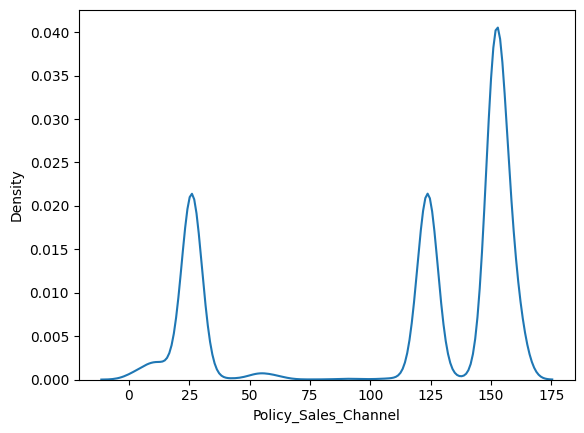

In [26]:
sns.kdeplot(df['Policy_Sales_Channel'])

<Axes: xlabel='Vintage', ylabel='Density'>

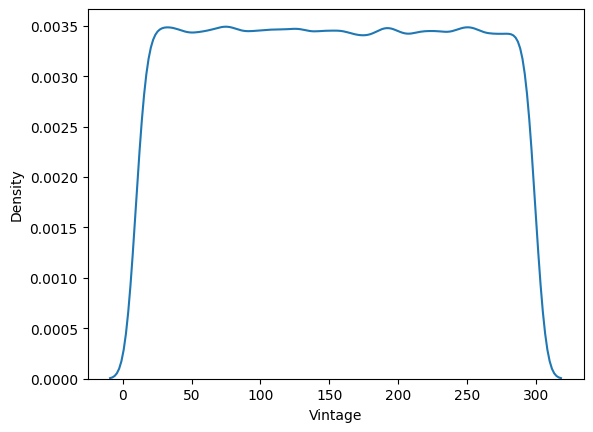

In [27]:
sns.kdeplot(df['Vintage'])

## feature engineering

In [4]:
def age_group(age):
    if age>=0 and age<=30:
        return 0
    elif age>=31 and age<=50:
        return 1
    return 2

df['Age_Group'] = df['Age'].map(age_group)

In [5]:
df['Old_Damaged_vehicle'] = ((df['Vehicle_Age'] == '> 2 Years')&(df['Vehicle_Damage'] == "Yes")).astype(int)

In [6]:
def premium_range(amount):
    if amount>0 and amount<=50000:
        return 0
    elif amount>=50001 and amount<=150000:
        return 1
    return 2

df['Premium_Range'] = df['Annual_Premium'].map(premium_range)

In [7]:
df['Premium_Per_Vintage'] = df['Annual_Premium']/df['Vintage']

In [8]:
def vehicle_age(age):
    if age == "1-2 Year":
        return 0 #39997
    elif age == "< 1 Year": #
        return 1
    return 2
    
df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age)

In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Group',
       'Old_Damaged_vehicle', 'Premium_Range', 'Premium_Per_Vintage'],
      dtype='object')

## model training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns=['id','Region_Code', 'Age', 'Annual_Premium','Response'])
y = df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)

In [12]:
x_train.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Old_Damaged_vehicle,Premium_Range,Premium_Per_Vintage
376863,Male,1,1,1,No,152.0,31,0,0,0,886.193548
121798,Male,1,0,0,Yes,124.0,134,2,0,0,19.626866
283194,Male,1,0,0,Yes,124.0,146,1,0,0,300.993151
106570,Male,1,0,0,Yes,156.0,35,1,0,0,75.142857
339758,Male,1,0,1,Yes,152.0,258,0,0,0,169.271318


In [13]:
y_train.head()

376863    0
121798    0
283194    0
106570    0
339758    0
Name: Response, dtype: int64

In [14]:
x_test.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Old_Damaged_vehicle,Premium_Range,Premium_Per_Vintage
284152,Male,1,1,0,No,124.0,154,2,0,0,294.779221
333608,Male,1,0,0,Yes,163.0,135,2,0,0,184.733333
248618,Male,1,1,1,No,152.0,24,0,0,0,1210.375000
175043,Male,1,0,0,Yes,26.0,195,1,0,1,295.446154
259911,Female,1,1,0,No,124.0,134,1,0,0,179.134328


In [15]:
y_test.head()

284152    0
333608    1
248618    0
175043    1
259911    0
Name: Response, dtype: int64

## preprocessing

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [18]:
x_train.head(2)

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Old_Damaged_vehicle,Premium_Range,Premium_Per_Vintage
376863,Male,1,1,1,No,152.0,31,0,0,0,886.193548
121798,Male,1,0,0,Yes,124.0,134,2,0,0,19.626866


In [19]:
trf1 = ColumnTransformer([
    ('OHE_gender', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), [0, 4])
], remainder='passthrough')

In [20]:
x_train_trf = trf1.fit_transform(x_train)
x_test_trf = trf1.transform(x_test)

In [21]:
x_train_trf[0]

array([  1.        ,   0.        ,   1.        ,   1.        ,
         1.        , 152.        ,  31.        ,   0.        ,
         0.        ,   0.        , 886.19354839])

In [22]:
trf2 = ColumnTransformer([
    ('PT-on-numerics', PowerTransformer(method='yeo-johnson'), [5, 6, 10])
], remainder='passthrough')

In [23]:
x_train_trf = trf2.fit_transform(x_train_trf)
x_test_trf = trf2.transform(x_test_trf)

In [24]:
x_train_trf[0]

array([ 0.76381729, -1.58399374,  1.32845508,  1.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from xgboost import XGBClassifier

# Logistic Regression with balanced class weight
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000) # accuracy 0.65

# Random Forest with class weights
rf = RandomForestClassifier(class_weight="balanced") # 0.85

brf = BalancedRandomForestClassifier(random_state=42, n_estimators=200) # 0.74

eec = EasyEnsembleClassifier(random_state=42, n_estimators=50) # 0.64

# scale_pos_weight = (negative_samples / positive_samples)
scale = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss",
                    scale_pos_weight=scale, random_state=42) #0.72

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 400, 600, 800],
    'max_depth':[10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(x_train_trf, y_train)

print(search.best_estimator_)
print(search.best_params_)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=800, random_state=42)
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [41]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_depth=None)

In [42]:
pipe = Pipeline([
    ('OHE', trf1),
    ('powerTransformation', trf2),
    ('model', rf)
])

In [43]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_gender',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4])])),
                ('powerTransformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('PT-on-numerics',
                                                  PowerTransformer(),
                                                  [5, 6, 10])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=800,
                                        random_state=42))])

In [44]:
y_pred = pipe.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89    267520
           1       0.31      0.41      0.35     37368

    accuracy                           0.82    304888
   macro avg       0.61      0.64      0.62    304888
weighted avg       0.84      0.82      0.83    304888



In [39]:
print(confusion_matrix(y_test, y_pred))

[[216122  51398]
 [ 14036  23332]]
